### Harry Potter Actors Face Recognition

In this colab, harry potter face recognition will be implemented using transfer learning

* First, we will use feature extraction transfer learning
* Second, we will use fine-tuning transfer learning

You can see all the steps that we will take sequentially below:

1. Import all necessary data and plot them to visualize
2. Preprocess the image for model that we will create
3. Create feature extraction model
4. Compile the model
5. Fit the model
6. Evaluate the model
7. Implement fine-tuning transfer learning upon feature extration

**NOTE :** In this colab, we will use two callbacks:
1. ModelCheckpoint callback
2. Tensorboard callback

**NOTE :** In this colab, To simplify understanding we will import predefined methods *helper_functions.py" to help us throughout the model implementing steps


### 1. Import all necessary data and plot them to visualize

In [21]:
import tensorflow as tf
from helper_functions import walk_through_dir,view_random_image,plot_loss_curves,pred_and_plot,create_tensorboard_callback,load_and_prep_image

# import necessary data to colab
train_dir = "/content/drive/MyDrive/Data/harry_potter/Train"
test_dir = "/content/drive/MyDrive/Data/harry_potter/Test"

# Set up data inputs
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224),
                                                                 batch_size=32
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224),
                                                                 batch_size=32
                                                                 )

# create the class_names for future steps
class_names=train_data.class_names;


Found 192 files belonging to 16 classes.
Found 106 files belonging to 16 classes.


In [22]:
# let's control How many images we have
walk_through_dir("/content/drive/MyDrive/Data/harry_potter")

There are 2 directories and 0 images in '/content/drive/MyDrive/Data/harry_potter'.
There are 16 directories and 0 images in '/content/drive/MyDrive/Data/harry_potter/Train'.
There are 0 directories and 12 images in '/content/drive/MyDrive/Data/harry_potter/Train/Julie Walters'.
There are 0 directories and 14 images in '/content/drive/MyDrive/Data/harry_potter/Train/Maggie Smith'.
There are 0 directories and 11 images in '/content/drive/MyDrive/Data/harry_potter/Train/Mark Williams'.
There are 0 directories and 12 images in '/content/drive/MyDrive/Data/harry_potter/Train/Matthew Lewis'.
There are 0 directories and 13 images in '/content/drive/MyDrive/Data/harry_potter/Train/Michael Gambon'.
There are 0 directories and 9 images in '/content/drive/MyDrive/Data/harry_potter/Train/Rupert Grint'.
There are 0 directories and 8 images in '/content/drive/MyDrive/Data/harry_potter/Train/Tom Felton'.
There are 0 directories and 13 images in '/content/drive/MyDrive/Data/harry_potter/Train/Ralph F

### 2. Preprocess the image for model that we will create

In [46]:

# For preprocessing and for preventing overfitting, let's augment the data
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# build data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1./255) # if you are using a model such as ResNet50V2, you'll need to rescale your data
], name="Data_augmentation")


### 3. Create feature extraction model

In [47]:

# setup the input shape to our model
input_shape=(224,224,3)

# cretae a frozen base model (also called backbone)
base_model = tf.keras.applications.EfficientNetB7(include_top=False)
base_model.trainable=False

# create the inputs and outputs (including the layers between)
inputs = layers.Input(shape=input_shape,name="Input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(16,activation="softmax",name="output_layer")(x)
model=tf.keras.Model(inputs,outputs)


### 4. Compile the model

In [48]:
# compile the model (and whenever model is changed)
model.compile(
    loss = "categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [49]:
# let's see the model architecture
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_average_pooling_laye  (None, 2560)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 16)                40976     
                                                                 
Total params: 64,138,663
Trainable params: 40,976
Non-train

Creating a ModelCheckpoint callback

In [50]:
# set checkpoint path
chck_path = "harry_potter_ckpt"

# create a modelcheckpoint callback that saves the model's weight only
chck_callback = tf.keras.callbacks.ModelCheckpoint(filepath=chck_path,
                                                   save_weights_only=True,
                                                   save_best_only=False,
                                                   save_freq="epoch",# save every epoch
                                                   verbose=1 # to see its going
                                                   )

### 5. Fit the model

In [66]:
# fit the model saving checkpoints every epoch
initial_epoch=20

# fit the model
hist_1 = model.fit(train_data,
                   epochs=initial_epoch,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data),
                   # Track model training loss and accuracy
                   callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                            experiment_name="harry_potter_actors_face_recognition_feature_extraction"),
                                chck_callback]
                   )

Saving TensorBoard log files to: transfer_learning/harry_potter_actors_face_recognition_feature_extraction/20230905-143917
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.5006 - accuracy: 0.9219
Epoch 1: saving model to harry_potter_ckpt
6/6 [==============================] - 89s 5s/step - loss: 0.5006 - accuracy: 0.9219 - val_loss: 1.2187 - val_accuracy: 0.6415
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9896
Epoch 2: saving model to harry_potter_ckpt
6/6 [==============================] - 18s 3s/step - loss: 0.1708 - accuracy: 0.9896 - val_loss: 1.1805 - val_accuracy: 0.6509
Epoch 3/20
6/6 [==============================] - ETA: 0s - loss: 0.0744 - accuracy: 0.9896
Epoch 3: saving model to harry_potter_ckpt
6/6 [==============================] - 18s 3s/step - loss: 0.0744 - accuracy: 0.9896 - val_loss: 1.1386 - val_accuracy: 0.6415
Epoch 4/20
6/6 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9896

Looks like our model is not good enough
* Let's evaluate model and make some predictions with it


## 6. Evaluate the model

In [67]:
results_1=model.evaluate(test_data)

4/4 [==============================] - 2s 278ms/step - loss: 1.4078 - accuracy: 0.6509


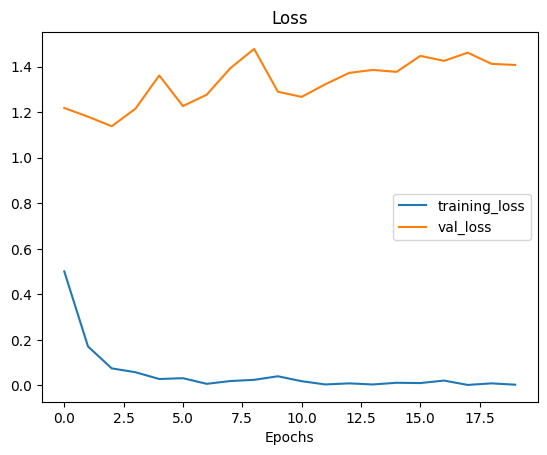

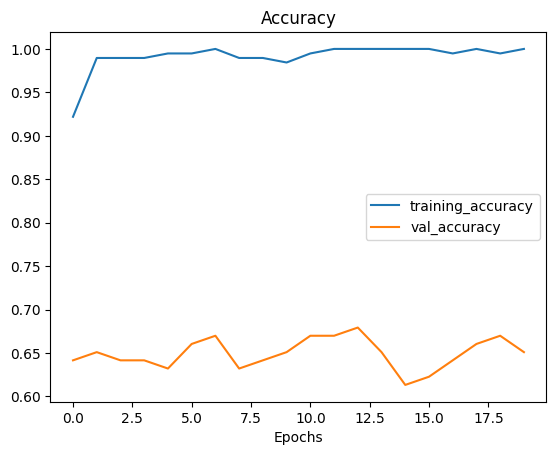

In [68]:
plot_loss_curves(hist_1)

1/1 [==============================] - 6s 6s/step


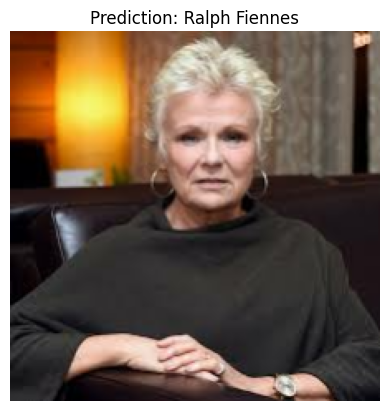

In [69]:
filename = "/content/drive/MyDrive/Data/harry_potter/Test/Julie Walters/Julie Walters (12).jpg"
pred_and_plot(model,filename,class_names)

### 7. Implement fine-tuning transfer learning upon feature extration

In [70]:
len(base_model.layers)

814

In [71]:
# To begin with fine-tuning, let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable=True

# Freeze all layers except for the last 200
for layer in base_model.layers[:-200]:
  layer.trainable=False

# Recompile (we have to recompile our models every time we make a change)
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), # for fine-tuning rule you want to lower your learning_rate by 10x
                metrics=["accuracy"]
                )

# Fine tune for another 5 epochs
fine_tune_epochs = initial_epoch + 20

# Refit the model (same as model_2 except with more trainable layers)
hist_2 = model.fit(train_data,
                     epochs=fine_tune_epochs,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data),
                     initial_epoch = hist_1.epoch[-1], # start training from previouslast epoch
                     callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                            experiment_name="harry_potter_actors_face_recognition_fine_tuning"),
                                chck_callback]
                     )


Saving TensorBoard log files to: transfer_learning/harry_potter_actors_face_recognition_fine_tuning/20230905-145044
Epoch 20/40
6/6 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 20: saving model to harry_potter_ckpt
6/6 [==============================] - 91s 7s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4431 - val_accuracy: 0.6792
Epoch 21/40
6/6 [==============================] - ETA: 0s - loss: 3.3235e-04 - accuracy: 1.0000
Epoch 21: saving model to harry_potter_ckpt
6/6 [==============================] - 28s 5s/step - loss: 3.3235e-04 - accuracy: 1.0000 - val_loss: 1.7241 - val_accuracy: 0.6981
Epoch 22/40
6/6 [==============================] - ETA: 0s - loss: 6.4942e-04 - accuracy: 1.0000
Epoch 22: saving model to harry_potter_ckpt
6/6 [==============================] - 33s 6s/step - loss: 6.4942e-04 - accuracy: 1.0000 - val_loss: 2.0332 - val_accuracy: 0.6604
Epoch 23/40
6/6 [==============================] - ETA: 0s - loss: 0.0038 - 

In [72]:
model.evaluate(test_data)

4/4 [==============================] - 2s 284ms/step - loss: 1.7955 - accuracy: 0.7264


[1.795462727546692, 0.7264150977134705]

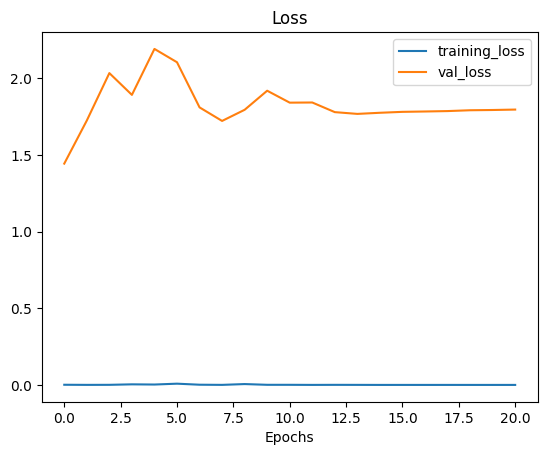

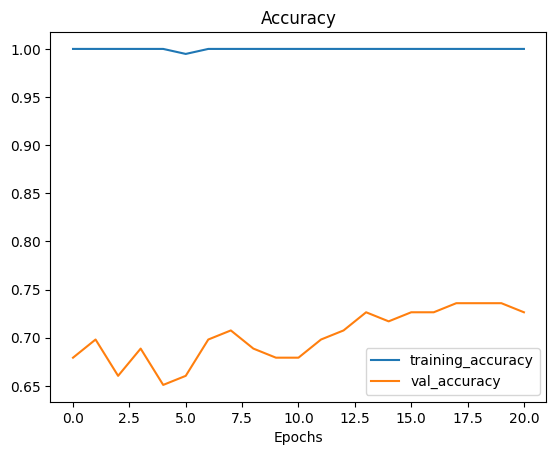

In [73]:
plot_loss_curves(hist_2)